In [6]:
'''Principal component analysis
transformation on data and using
Decision Tree Classifier 
'''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

In [12]:
# Importing principal component analysis for transformation
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Standard scale and Transform/rotate pipeline:
rotated_data = make_pipeline(StandardScaler(),PCA())

In [7]:
iris = load_iris(as_frame=True)
iris.data.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
71,6.1,2.8,4.0,1.3


In [14]:
x = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target.values
x_rotated = rotated_data.fit_transform(x)
dtree_pca_clf = DecisionTreeClassifier(max_depth=2)
dtree_pca_clf.fit(x_rotated,y)

DecisionTreeClassifier(max_depth=2)

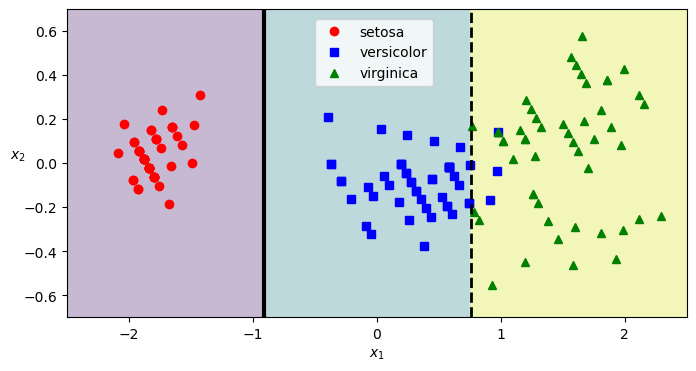

In [81]:
plt.figure(figsize=(8,4))
axes = [-2.5,2.5,-0.7,0.7]
nx,ny = np.meshgrid(np.linspace(axes[0], axes[1], 200),
                       np.linspace(axes[2], axes[3], 200))
x_topredict = np.c_[nx.ravel(),ny.ravel()]
y_predict = dtree_pca_clf.predict(x_topredict).reshape(nx.shape)
plt.contourf(nx,ny,y_predict,alpha=0.3)
for idx,(name,style) in enumerate(zip(iris.target_names,
                                      ("ro", "bs", "g^"))):
    plt.plot(x_rotated[:,0][y==idx],x_rotated[:,1][y==idx],
             style,label=f"{name}")
thr0,thr1 = dtree_pca_clf.tree_.threshold[[0,2]]
plt.plot([thr0,thr0],axes[2:],'k-',linewidth=3)
plt.plot([thr1,thr1],axes[2:],'k--',linewidth=2)
plt.legend(loc=(0.4,0.75))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

In [71]:
iris.target_names,dtree_pca_clf.tree_.threshold

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([-0.9111246 , -2.        ,  0.75787246, -2.        , -2.        ]))

In [82]:
iris.target_names[0],y[0],iris.target_names[0]==y[0]

('setosa', 0, False)

In [ ]:
"""Conclusion:
After rotating the data not only the decision
tree classifier was able to classify it very efficiently,
It was also able to do that based on one feature x1 and 
somewhat completely independent of x2"""